In [1]:
# pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#forecasting
import prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import Data 

In [3]:
df_shampoo=pd.read_csv('shampo sales.csv')
df_shampoo.tail()

Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9

## Split Data

In [4]:
df_shampoo_train=df_shampoo.iloc[:-5]
df_shampoo_test=df_shampoo.iloc[-5:]
display(df_shampoo_train,df_shampoo_test)

Month  Sales
0   1-01  266.0
1   1-02  145.9
2   1-03  183.1
3   1-04  119.3
4   1-05  180.3
5   1-06  168.5
6   1-07  231.8
7   1-08  224.5
8   1-09  192.8
9   1-10  122.9
10  1-11  336.5
11  1-12  185.9
12  2-01  194.3
13  2-02  149.5
14  2-03  210.1
15  2-04  273.3
16  2-05  191.4
17  2-06  287.0
18  2-07  226.0
19  2-08  303.6
20  2-09  289.9
21  2-10  421.6
22  2-11  264.5
23  2-12  342.3
24  3-01  339.7
25  3-02  440.4
26  3-03  315.9
27  3-04  439.3
28  3-05  401.3
29  3-06  437.4
30  3-07  575.5

Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9

## EDA

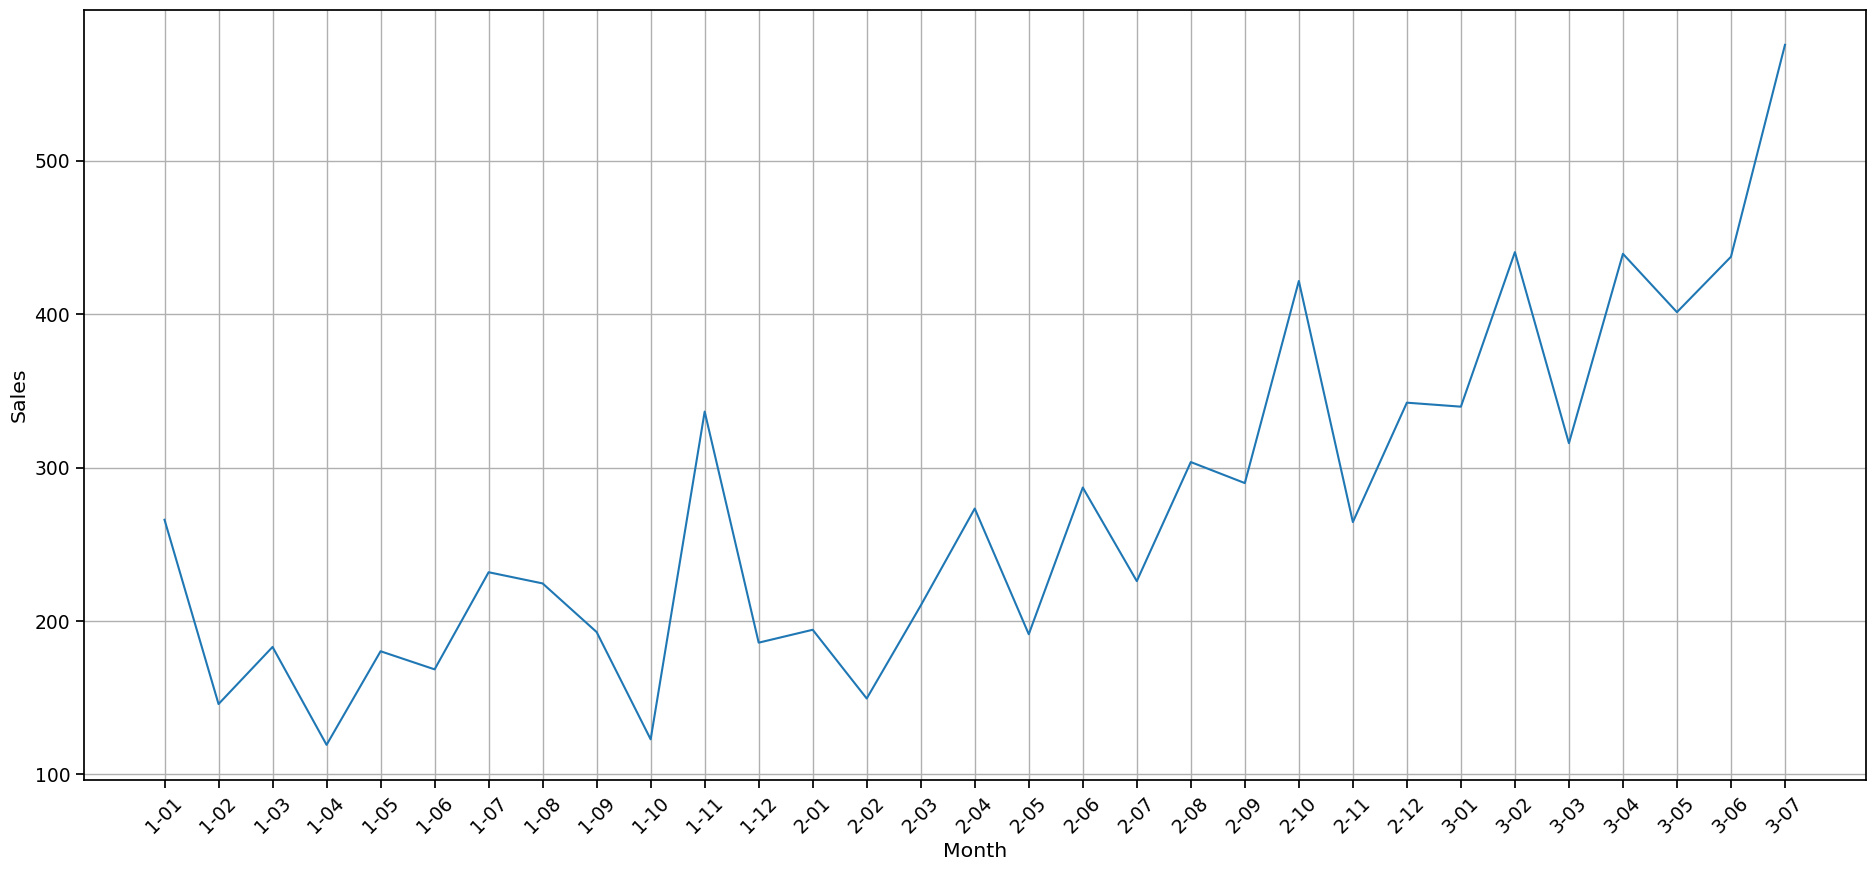

In [5]:
plt.figure(figsize=(23,10))
sns.set_context(context="notebook",font_scale=1.23)
sns.lineplot(x='Month',y='Sales',data=df_shampoo_train)
plt.xticks(rotation=23+23-1)
plt.grid()
plt.show()

### Auto Regressive (AR)

#### AR(1) / ARIMA(1,0,0)

In [6]:
df_shampoo_train['Lag_Sales1']=df_shampoo_train['Sales'].shift(1)
df_shampoo_train

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_82453/2262423497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shampoo_train['Lag_Sales1']=df_shampoo_train['Sales'].shift(1)


Month  Sales  Lag_Sales1
0   1-01  266.0         NaN
1   1-02  145.9       266.0
2   1-03  183.1       145.9
3   1-04  119.3       183.1
4   1-05  180.3       119.3
5   1-06  168.5       180.3
6   1-07  231.8       168.5
7   1-08  224.5       231.8
8   1-09  192.8       224.5
9   1-10  122.9       192.8
10  1-11  336.5       122.9
11  1-12  185.9       336.5
12  2-01  194.3       185.9
13  2-02  149.5       194.3
14  2-03  210.1       149.5
15  2-04  273.3       210.1
16  2-05  191.4       273.3
17  2-06  287.0       191.4
18  2-07  226.0       287.0
19  2-08  303.6       226.0
20  2-09  289.9       303.6
21  2-10  421.6       289.9
22  2-11  264.5       421.6
23  2-12  342.3       264.5
24  3-01  339.7       342.3
25  3-02  440.4       339.7
26  3-03  315.9       440.4
27  3-04  439.3       315.9
28  3-05  401.3       439.3
29  3-06  437.4       401.3
30  3-07  575.5       437.4

#### AR(2) / ARIMA(2,0,0)

In [7]:
df_shampoo_train['Lag_Sales2']=df_shampoo_train['Sales'].shift(2)
df_shampoo_train

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_82453/1010710585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shampoo_train['Lag_Sales2']=df_shampoo_train['Sales'].shift(2)


Month  Sales  Lag_Sales1  Lag_Sales2
0   1-01  266.0         NaN         NaN
1   1-02  145.9       266.0         NaN
2   1-03  183.1       145.9       266.0
3   1-04  119.3       183.1       145.9
4   1-05  180.3       119.3       183.1
5   1-06  168.5       180.3       119.3
6   1-07  231.8       168.5       180.3
7   1-08  224.5       231.8       168.5
8   1-09  192.8       224.5       231.8
9   1-10  122.9       192.8       224.5
10  1-11  336.5       122.9       192.8
11  1-12  185.9       336.5       122.9
12  2-01  194.3       185.9       336.5
13  2-02  149.5       194.3       185.9
14  2-03  210.1       149.5       194.3
15  2-04  273.3       210.1       149.5
16  2-05  191.4       273.3       210.1
17  2-06  287.0       191.4       273.3
18  2-07  226.0       287.0       191.4
19  2-08  303.6       226.0       287.0
20  2-09  289.9       303.6       226.0
21  2-10  421.6       289.9       303.6
22  2-11  264.5       421.6       289.9
23  2-12  342.3       264.5       421.6
24  3-01  339.7       342.3       264.5
25  3-02  440.4       339.7       342.3
26  3-03  315.9       440.4       339.7
27  3-04  439.3       315.9       440.4
28  3-05  401.3       439.3       315.9
29  3-06  437.4       401.3       439.3
30  3-07  575.5       437.4       401.3

### Integrated (I)

#### I(1) / ARIMA(0,1,0) -> Differencing level 1

In [8]:
df_shampoo_train['Sales Stasionary']=df_shampoo_train['Sales'].diff(1)
df_shampoo_train

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_82453/1081160520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shampoo_train['Sales Stasionary']=df_shampoo_train['Sales'].diff(1)


Month  Sales  Lag_Sales1  Lag_Sales2  Sales Stasionary
0   1-01  266.0         NaN         NaN               NaN
1   1-02  145.9       266.0         NaN            -120.1
2   1-03  183.1       145.9       266.0              37.2
3   1-04  119.3       183.1       145.9             -63.8
4   1-05  180.3       119.3       183.1              61.0
5   1-06  168.5       180.3       119.3             -11.8
6   1-07  231.8       168.5       180.3              63.3
7   1-08  224.5       231.8       168.5              -7.3
8   1-09  192.8       224.5       231.8             -31.7
9   1-10  122.9       192.8       224.5             -69.9
10  1-11  336.5       122.9       192.8             213.6
11  1-12  185.9       336.5       122.9            -150.6
12  2-01  194.3       185.9       336.5               8.4
13  2-02  149.5       194.3       185.9             -44.8
14  2-03  210.1       149.5       194.3              60.6
15  2-04  273.3       210.1       149.5              63.2
16  2-05  191.4       273.3       210.1             -81.9
17  2-06  287.0       191.4       273.3              95.6
18  2-07  226.0       287.0       191.4             -61.0
19  2-08  303.6       226.0       287.0              77.6
20  2-09  289.9       303.6       226.0             -13.7
21  2-10  421.6       289.9       303.6             131.7
22  2-11  264.5       421.6       289.9            -157.1
23  2-12  342.3       264.5       421.6              77.8
24  3-01  339.7       342.3       264.5              -2.6
25  3-02  440.4       339.7       342.3             100.7
26  3-03  315.9       440.4       339.7            -124.5
27  3-04  439.3       315.9       440.4             123.4
28  3-05  401.3       439.3       315.9             -38.0
29  3-06  437.4       401.3       439.3              36.1
30  3-07  575.5       437.4       401.3             138.1

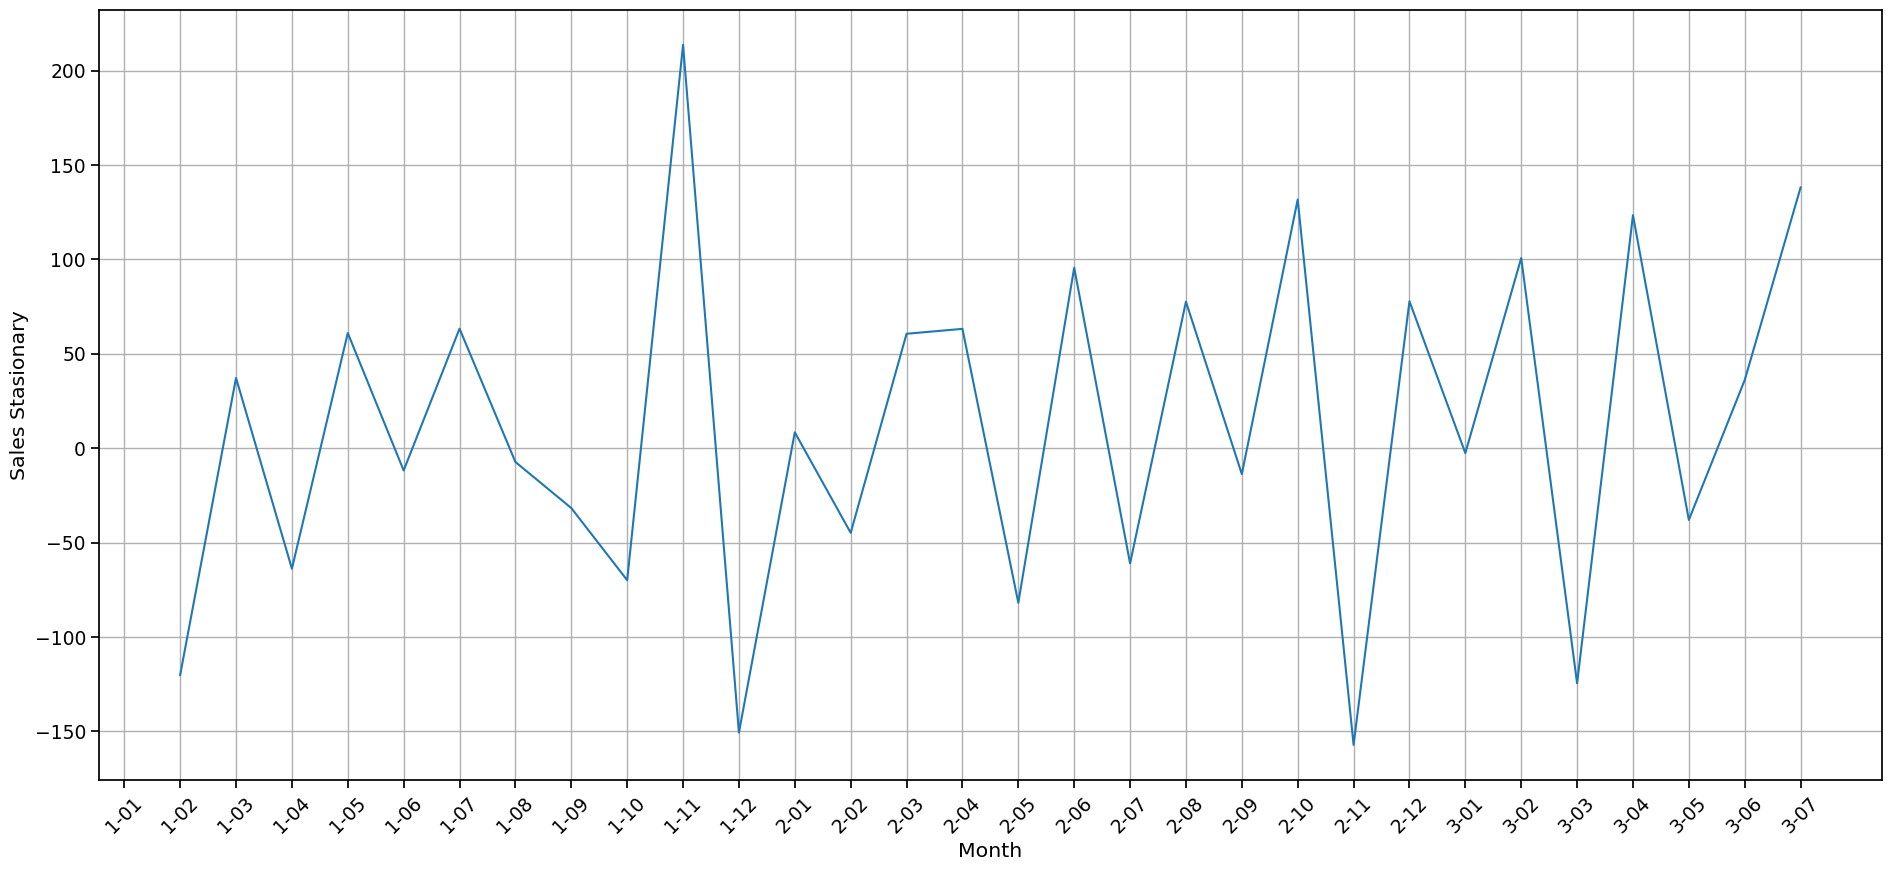

In [9]:
plt.figure(figsize=(23,10))
sns.set_context(context="notebook",font_scale=1.23)
sns.lineplot(x='Month',y='Sales Stasionary',data=df_shampoo_train)
plt.xticks(rotation=23+23-1)
plt.grid()
plt.show()

#### I(2) / ARIMA(0,2,0) -> Differencing level 2

In [10]:
df_shampoo_train['Sales Stasionary 2']=df_shampoo_train['Sales Stasionary'].diff(1)
df_shampoo_train

/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_82453/2553868569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shampoo_train['Sales Stasionary 2']=df_shampoo_train['Sales Stasionary'].diff(1)


Month  Sales  Lag_Sales1  Lag_Sales2  Sales Stasionary  Sales Stasionary 2
0   1-01  266.0         NaN         NaN               NaN                 NaN
1   1-02  145.9       266.0         NaN            -120.1                 NaN
2   1-03  183.1       145.9       266.0              37.2               157.3
3   1-04  119.3       183.1       145.9             -63.8              -101.0
4   1-05  180.3       119.3       183.1              61.0               124.8
5   1-06  168.5       180.3       119.3             -11.8               -72.8
6   1-07  231.8       168.5       180.3              63.3                75.1
7   1-08  224.5       231.8       168.5              -7.3               -70.6
8   1-09  192.8       224.5       231.8             -31.7               -24.4
9   1-10  122.9       192.8       224.5             -69.9               -38.2
10  1-11  336.5       122.9       192.8             213.6               283.5
11  1-12  185.9       336.5       122.9            -150.6              -364.2
12  2-01  194.3       185.9       336.5               8.4               159.0
13  2-02  149.5       194.3       185.9             -44.8               -53.2
14  2-03  210.1       149.5       194.3              60.6               105.4
15  2-04  273.3       210.1       149.5              63.2                 2.6
16  2-05  191.4       273.3       210.1             -81.9              -145.1
17  2-06  287.0       191.4       273.3              95.6               177.5
18  2-07  226.0       287.0       191.4             -61.0              -156.6
19  2-08  303.6       226.0       287.0              77.6               138.6
20  2-09  289.9       303.6       226.0             -13.7               -91.3
21  2-10  421.6       289.9       303.6             131.7               145.4
22  2-11  264.5       421.6       289.9            -157.1              -288.8
23  2-12  342.3       264.5       421.6              77.8               234.9
24  3-01  339.7       342.3       264.5              -2.6               -80.4
25  3-02  440.4       339.7       342.3             100.7               103.3
26  3-03  315.9       440.4       339.7            -124.5              -225.2
27  3-04  439.3       315.9       440.4             123.4               247.9
28  3-05  401.3       439.3       315.9             -38.0              -161.4
29  3-06  437.4       401.3       439.3              36.1                74.1
30  3-07  575.5       437.4       401.3             138.1               102.0

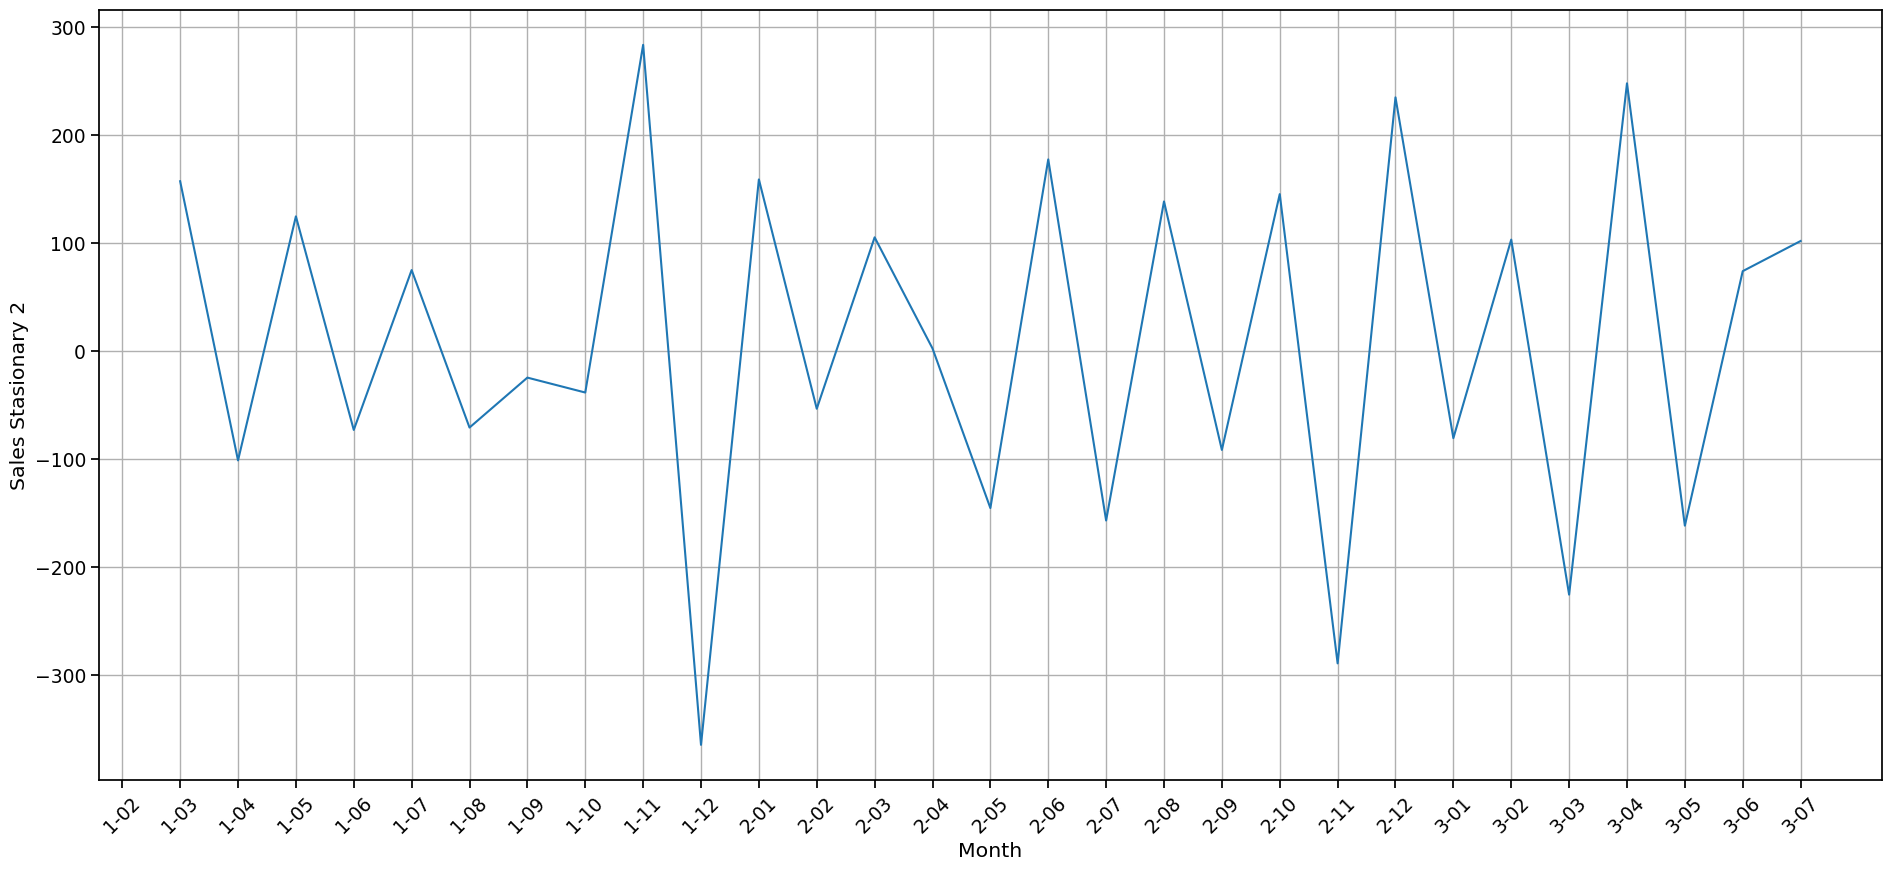

In [11]:
plt.figure(figsize=(23,10))
sns.set_context(context="notebook",font_scale=1.23)
sns.lineplot(x='Month',y='Sales Stasionary 2',data=df_shampoo_train)
plt.xticks(rotation=23+23-1)
plt.grid()
plt.show()

### Moving Average (MA)

#### MA(1) / ARIMA(0,0,1)
#### MA(2) / ARIMA(0,0,2)

In [12]:
import warnings
warnings.filterwarnings('ignore')
df_shampoo_train['Moving Average']=df_shampoo_train['Sales']-df_shampoo_train['Sales'].mean()
df_shampoo_train['Moving Average Lag1']=df_shampoo_train['Moving Average'].shift(1)
df_shampoo_train['Moving Average Lag2']=df_shampoo_train['Moving Average Lag1'].shift(1)
df_shampoo_train

Month  Sales  Lag_Sales1  Lag_Sales2  Sales Stasionary  Sales Stasionary 2  \
0   1-01  266.0         NaN         NaN               NaN                 NaN   
1   1-02  145.9       266.0         NaN            -120.1                 NaN   
2   1-03  183.1       145.9       266.0              37.2               157.3   
3   1-04  119.3       183.1       145.9             -63.8              -101.0   
4   1-05  180.3       119.3       183.1              61.0               124.8   
5   1-06  168.5       180.3       119.3             -11.8               -72.8   
6   1-07  231.8       168.5       180.3              63.3                75.1   
7   1-08  224.5       231.8       168.5              -7.3               -70.6   
8   1-09  192.8       224.5       231.8             -31.7               -24.4   
9   1-10  122.9       192.8       224.5             -69.9               -38.2   
10  1-11  336.5       122.9       192.8             213.6               283.5   
11  1-12  185.9       336.5       122.9            -150.6              -364.2   
12  2-01  194.3       185.9       336.5               8.4               159.0   
13  2-02  149.5       194.3       185.9             -44.8               -53.2   
14  2-03  210.1       149.5       194.3              60.6               105.4   
15  2-04  273.3       210.1       149.5              63.2                 2.6   
16  2-05  191.4       273.3       210.1             -81.9              -145.1   
17  2-06  287.0       191.4       273.3              95.6               177.5   
18  2-07  226.0       287.0       191.4             -61.0              -156.6   
19  2-08  303.6       226.0       287.0              77.6               138.6   
20  2-09  289.9       303.6       226.0             -13.7               -91.3   
21  2-10  421.6       289.9       303.6             131.7               145.4   
22  2-11  264.5       421.6       289.9            -157.1              -288.8   
23  2-12  342.3       264.5       421.6              77.8               234.9   
24  3-01  339.7       342.3       264.5              -2.6               -80.4   
25  3-02  440.4       339.7       342.3             100.7               103.3   
26  3-03  315.9       440.4       339.7            -124.5              -225.2   
27  3-04  439.3       315.9       440.4             123.4               247.9   
28  3-05  401.3       439.3       315.9             -38.0              -161.4   
29  3-06  437.4       401.3       439.3              36.1                74.1   
30  3-07  575.5       437.4       401.3             138.1               102.0   

    Moving Average  Moving Average Lag1  Moving Average Lag2  
0        -6.919355                  NaN                  NaN  
1      -127.019355            -6.919355                  NaN  
2       -89.819355          -127.019355            -6.919355  
3      -153.619355           -89.819355          -127.019355  
4       -92.619355          -153.619355           -89.819355  
5      -104.419355           -92.619355          -153.619355  
6       -41.119355          -104.419355           -92.619355  
7       -48.419355           -41.119355          -104.419355  
8       -80.119355           -48.419355           -41.119355  
9      -150.019355           -80.119355           -48.419355  
10       63.580645          -150.019355           -80.119355  
11      -87.019355            63.580645          -150.019355  
12      -78.619355           -87.019355            63.580645  
13     -123.419355           -78.619355           -87.019355  
14      -62.819355          -123.419355           -78.619355  
15        0.380645           -62.819355          -123.419355  
16      -81.519355             0.380645           -62.819355  
17       14.080645           -81.519355             0.380645  
18      -46.919355            14.080645           -81.519355  
19       30.680645           -46.919355            14.080645  
20       16.980645            30.680645           -46.919355  
21      148.680645      

## ACF / PACF

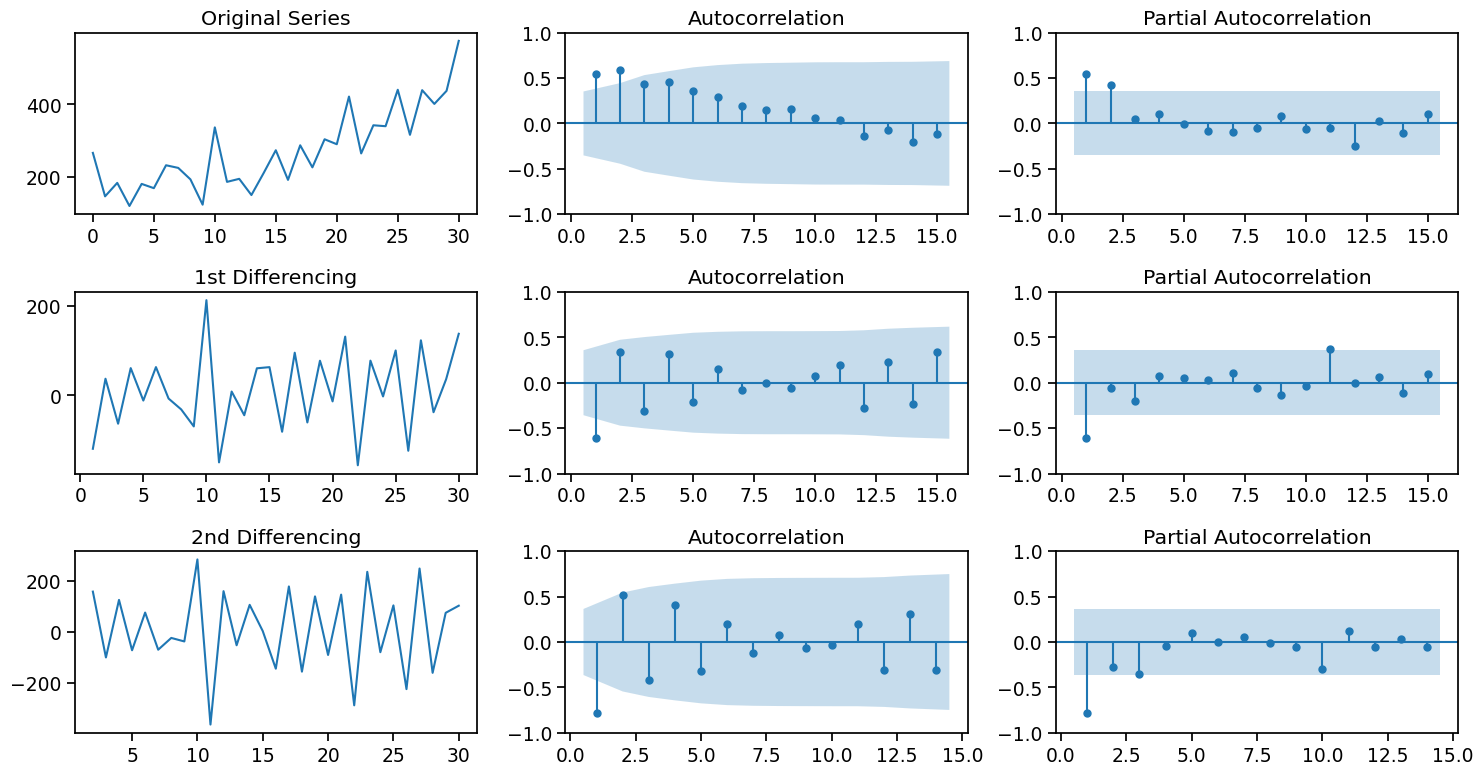

In [13]:
fig,axes=plt.subplots(3,3,figsize=(15,8))

#sales original
axes[0,0].plot(df_shampoo_train['Sales']);axes[0,0].set_title('Original Series')
plot_acf(df_shampoo_train['Sales'],zero=False,ax=axes[0,1])
plot_pacf(df_shampoo_train['Sales'],zero=False,ax=axes[0,2])

#1st differencing
axes[1,0].plot(df_shampoo_train['Sales Stasionary']);axes[1,0].set_title('1st Differencing')
plot_acf(df_shampoo_train['Sales Stasionary'].dropna(),zero=False,ax=axes[1,1])
plot_pacf(df_shampoo_train['Sales Stasionary'].dropna(),zero=False,ax=axes[1,2])


#2nd differencing
axes[2,0].plot(df_shampoo_train['Sales Stasionary 2']);axes[2,0].set_title('2nd Differencing')
plot_acf(df_shampoo_train['Sales Stasionary 2'].dropna(),zero=False,ax=axes[2,1])
plot_pacf(df_shampoo_train['Sales Stasionary 2'].dropna(),zero=False,ax=axes[2,2])
plt.tight_layout()
plt.show()

## Modelling

### ARIMA(1,1,0)

In [14]:
#create model
model=ARIMA(df_shampoo_train['Sales'],order=(1,1,0))

#fit model
model_fit=model.fit()

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   31
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -170.421
Date:                Thu, 30 Jan 2025   AIC                            344.842
Time:                        11:56:30   BIC                            347.645
Sample:                             0   HQIC                           345.739
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6568      0.187     -3.511      0.000      -1.023      -0.290
sigma2      4945.4456   1285.064      3.848      0.000    2426.767    7464.125
Ljung-Box (L1) (Q):                   0.28   Jarque-

## Forecasting ARIMA

In [16]:
forecast_length=5
forecast_result=model_fit.forecast(forecast_length)

In [17]:
Month=['3-08', '3-09', '3-10', '3-11', '3-12']

In [18]:
df_forecast=pd.DataFrame({'Month':Month,'Sales':forecast_result})
df_forecast

Month       Sales
31  3-08  484.796688
32  3-09  544.370119
33  3-10  505.242621
34  3-11  530.941344
35  3-12  514.062565

### Forecast Visualization

In [19]:
import plotly.graph_objects as go

In [20]:
fig=go.Figure([go.Scatter(name='Actual',x=df_shampoo['Month'],y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(name='Forecast',x=df_forecast['Month'],y=df_forecast['Sales']))
fig.show()

### ARIMA(0,1,1)

In [21]:
# #create model
# model=ARIMA(df_shampoo_train['Sales'],order=(0,1,1))

# #fit model
# model_fit=model.fit()

In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   31
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -170.421
Date:                Thu, 30 Jan 2025   AIC                            344.842
Time:                        11:56:30   BIC                            347.645
Sample:                             0   HQIC                           345.739
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6568      0.187     -3.511      0.000      -1.023      -0.290
sigma2      4945.4456   1285.064      3.848      0.000    2426.767    7464.125
Ljung-Box (L1) (Q):                   0.28   Jarque-

## Forecasting ARIMA

In [23]:
forecast_length=5
forecast_result=model_fit.forecast(forecast_length)

In [24]:
Month=['3-08', '3-09', '3-10', '3-11', '3-12']

In [25]:
df_forecast=pd.DataFrame({'Month':Month,'Sales':forecast_result})
df_forecast

Month       Sales
31  3-08  484.796688
32  3-09  544.370119
33  3-10  505.242621
34  3-11  530.941344
35  3-12  514.062565

### Forecast Visualization

In [26]:
import plotly.graph_objects as go

In [27]:
fig=go.Figure([go.Scatter(name='Actual',x=df_shampoo['Month'],y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(name='Forecast',x=df_forecast['Month'],y=df_forecast['Sales']))
fig.show()

## Prophet Model

In [28]:
df_shampoo=pd.read_csv('shampo sales.csv')
df_shampoo.tail()

Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9

In [29]:
# change column name
df_shampoo.columns=['ds','y']


#convert to proper date
df_shampoo['ds']=pd.to_datetime(df_shampoo['ds'].apply(lambda x : f"{'200'+x}"))



df_shampoo

ds      y
0  2001-01-01  266.0
1  2001-02-01  145.9
2  2001-03-01  183.1
3  2001-04-01  119.3
4  2001-05-01  180.3
5  2001-06-01  168.5
6  2001-07-01  231.8
7  2001-08-01  224.5
8  2001-09-01  192.8
9  2001-10-01  122.9
10 2001-11-01  336.5
11 2001-12-01  185.9
12 2002-01-01  194.3
13 2002-02-01  149.5
14 2002-03-01  210.1
15 2002-04-01  273.3
16 2002-05-01  191.4
17 2002-06-01  287.0
18 2002-07-01  226.0
19 2002-08-01  303.6
20 2002-09-01  289.9
21 2002-10-01  421.6
22 2002-11-01  264.5
23 2002-12-01  342.3
24 2003-01-01  339.7
25 2003-02-01  440.4
26 2003-03-01  315.9
27 2003-04-01  439.3
28 2003-05-01  401.3
29 2003-06-01  437.4
30 2003-07-01  575.5
31 2003-08-01  407.6
32 2003-09-01  682.0
33 2003-10-01  475.3
34 2003-11-01  581.3
35 2003-12-01  646.9

In [30]:
train=df_shampoo.iloc[:-5]
test=df_shampoo.iloc[-5:]

## EDA

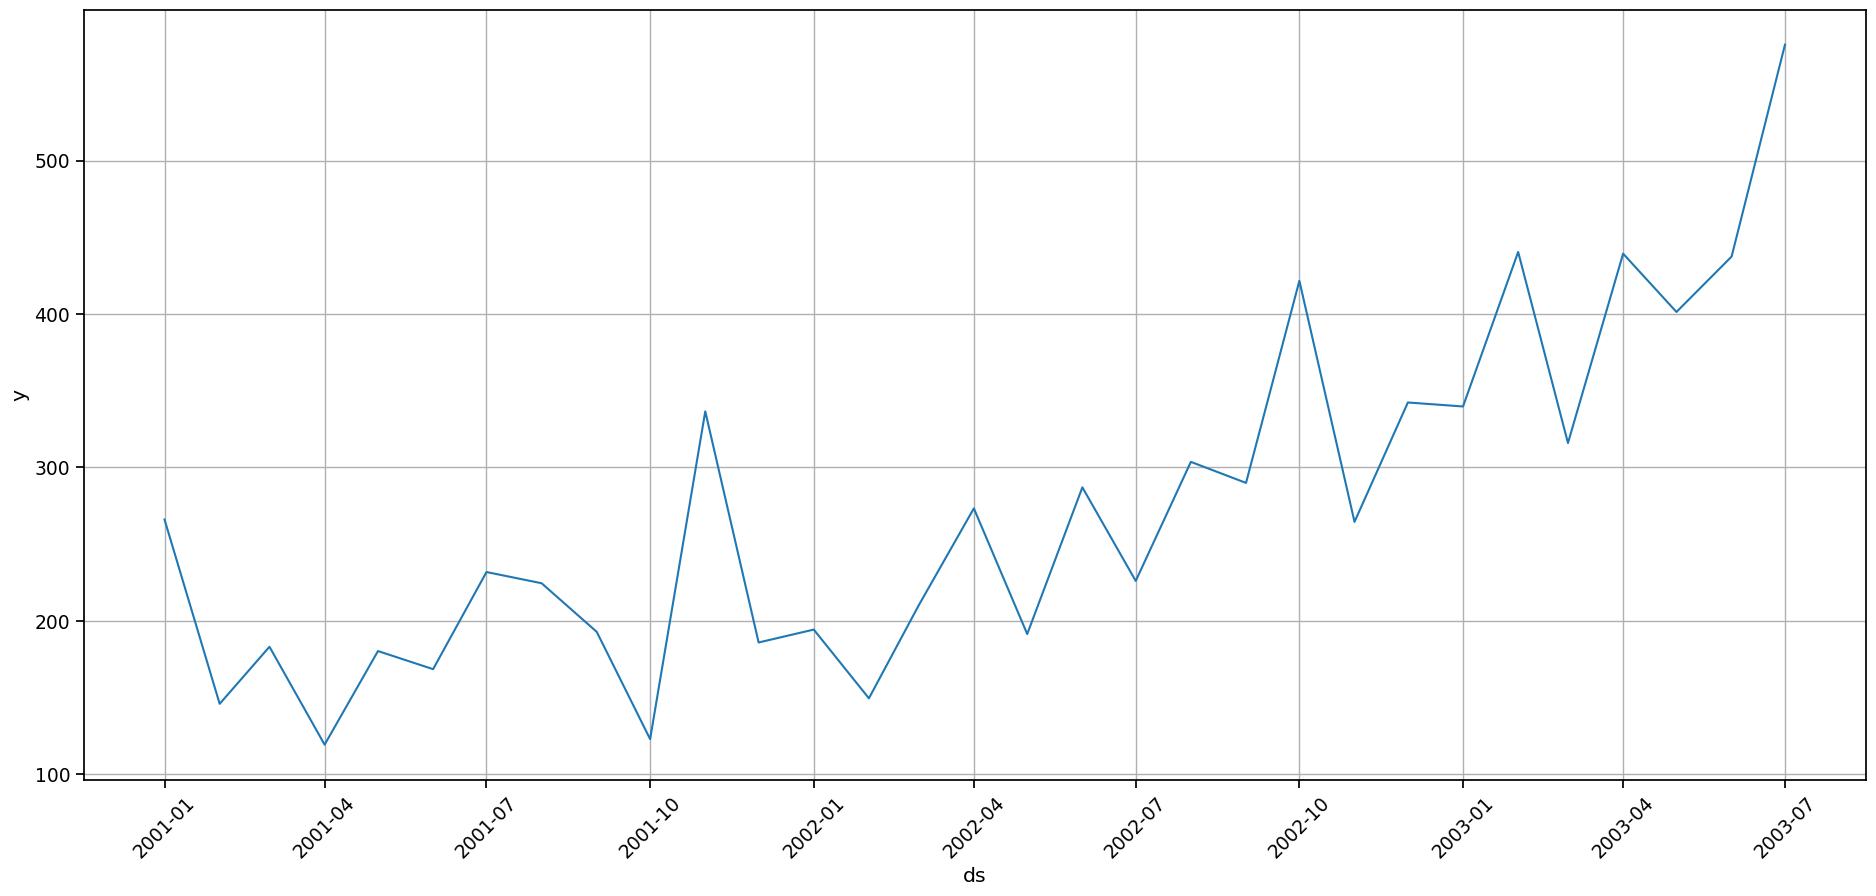

In [31]:
plt.figure(figsize=(23,10))
sns.set_context(context="notebook",font_scale=1.23)
sns.lineplot(x='ds',y='y',data=train)
plt.xticks(rotation=23+23-1)
plt.grid()
plt.show()

## Forecast with Prophet

In [32]:
model=prophet.Prophet(yearly_seasonality=True)
model.fit(train)

11:56:30 - cmdstanpy - INFO - Chain [1] start processing
11:56:30 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
model.predict(test[['ds']])['yhat']

0    319.618230
1    354.568005
2    719.156077
3    242.198354
4    572.158361
Name: yhat, dtype: float64

## Forecast Visualization

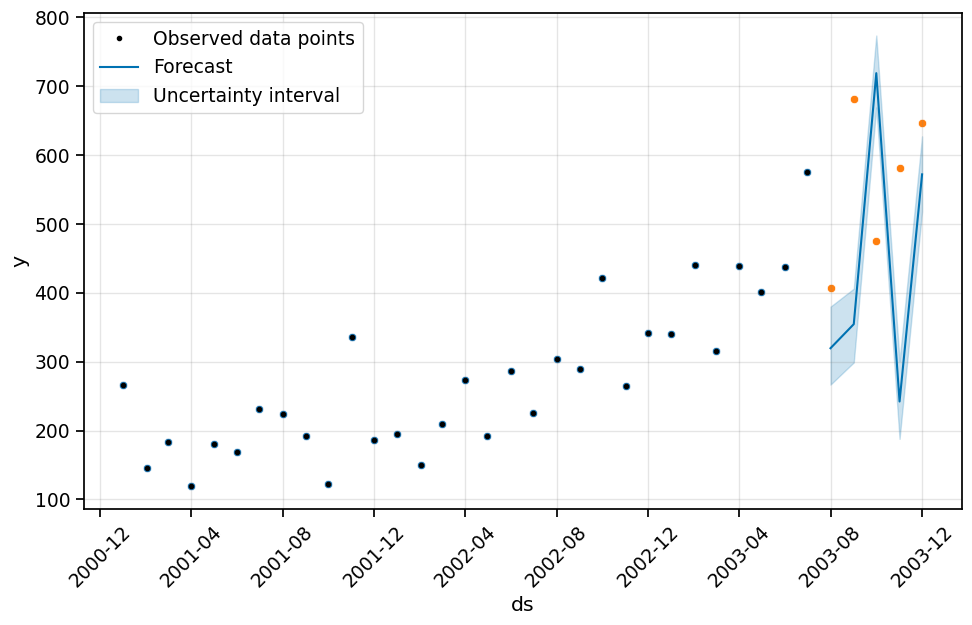

In [34]:
model.plot(model.predict(test[['ds']]))
sns.scatterplot(x='ds',y='y',data=train)
sns.scatterplot(x='ds',y='y',data=test)
plt.xticks(rotation=45)
plt.show()

In [35]:
forecast_length=5
forecast_result=model.predict(test[['ds']])['yhat']

Month=['3-08', '3-09', '3-10', '3-11', '3-12']

df_forecast_prophet=pd.DataFrame({'Month':Month,'Sales':forecast_result})
df_forecast_prophet

Month       Sales
0  3-08  319.618230
1  3-09  354.568005
2  3-10  719.156077
3  3-11  242.198354
4  3-12  572.158361

## ARIMA vs Prophet

In [38]:
df_shampoo=pd.read_csv('shampo sales.csv')
fig=go.Figure([go.Scatter(name='Actual',x=df_shampoo['Month'],y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(name='ARIMA',x=df_forecast['Month'],y=df_forecast['Sales']))
fig.add_trace(go.Scatter(name='Prophet',x=df_forecast_prophet['Month'],y=df_forecast_prophet['Sales']))
fig.show()